In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats
from statannot import add_stat_annotation

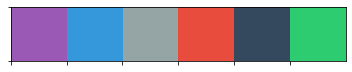

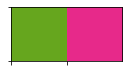

In [2]:
custcol = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
custcoltemp = ["#66a61e", "#e7298a"]

sns.palplot(sns.color_palette(custcol))
sns.palplot(sns.color_palette(custcoltemp))

In [3]:
datapath = "./"
file_to_open = datapath + "Figure2b_raw_data.txt"

# print(os.path.realpath(file_to_open))


In [4]:
data1 = pd.read_csv(file_to_open, sep = "\t", header = 0)

In [5]:
data1["titerLog"] = np.log10(data1['titer'])

In [6]:
vSARS = data1.loc[data1["virus"]=="SARS"]
vSARS2 = data1.loc[data1["virus"]=="SARS2"]

In [7]:
t33 = data1.loc[data1["temperature"]==33]
t37 = data1.loc[data1["temperature"]==37]

In [8]:
SARS_33 = t33.loc[t33["virus"]== "SARS"]
SARS2_33 = t33.loc[t33["virus"]== "SARS2"]

SARS_37 = t37.loc[t37["virus"]== "SARS"]
SARS2_37 = t37.loc[t37["virus"]== "SARS2"]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_T1 v.s. 1_T3: t-test paired samples, P_val=7.502e-02 stat=3.442e+00
24_N v.s. 24_T1: t-test paired samples, P_val=2.063e-01 stat=1.845e+00
24_T1 v.s. 24_T3: t-test paired samples, P_val=3.260e-01 stat=-1.290e+00
48_N v.s. 48_T1: t-test paired samples, P_val=5.527e-02 stat=4.075e+00
48_T1 v.s. 48_T3: t-test paired samples, P_val=9.164e-01 stat=1.186e-01
72_N v.s. 72_T1: t-test paired samples, P_val=4.836e-02 stat=4.381e+00
72_T1 v.s. 72_T3: t-test paired samples, P_val=4.226e-01 stat=1.000e+00
1_N v.s. 1_T1: t-test paired samples, P_val=1.223e-01 stat=-2.590e+00
24_N v.s. 24_T3: t-test paired samples, P_val=5.588e-01 stat=-6.952e-01
48_N v.s. 48_T3: t-test paired samples, P_val=6.588e-02 stat=3.701e+00
72_N v.s. 72_T3: t-test paired samples, P_val=3.520e-03 stat=1.681e+01
1_N v.s. 1_T3: t-test paired samples, P_val=7.347e-0

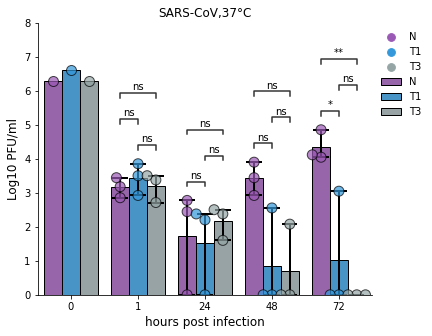

In [9]:
f = plt.figure(figsize=(6, 5))
ax = sns.barplot(data= SARS_37,
                x='hpi',
                y='titerLog', 
                hue="treatment",
                hue_order=["N", "T1", "T3"],
                palette = sns.color_palette(custcol),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )
g1 = sns.swarmplot(data= SARS_37,
                x='hpi',
                y='titerLog', 
                hue="treatment",
                hue_order=["N", "T1", "T3"],
                dodge = True, 
                palette = sns.color_palette(custcol),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.7,
                )

x = "hpi"
y='titerLog'
hue = "treatment"

box_pairs=[
    ((1.0, "N"), (1.0, "T1")),
    ((1.0, "N"), (1.0, "T3")),
    ((1.0, "T1"), (1.0, "T3")),
    ((24.0, "N"), (24.0, "T1")),
    ((24.0, "N"), (24.0, "T3")),
    ((24.0, "T1"), (24.0, "T3")),
    ((48.0, "N"), (48.0, "T1")),
    ((48.0, "N"), (48.0, "T3")),
    ((48.0, "T1"), (48.0, "T3")),
    ((72.0, "N"), (72.0, "T1")),
    ((72.0, "N"), (72.0, "T3")),
    ((72.0, "T1"), (72.0, "T3")),
    ]

add_stat_annotation(ax, data=SARS_37, x=x, y=y, hue=hue, hue_order=["N", "T1", "T3"], box_pairs=box_pairs, test='t-test_paired',  comparisons_correction= None, loc='inside', verbose=2)

plt.yscale("linear")
plt.ylim([0,8])
plt.title("SARS-CoV,37°C")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)
sns.despine()

plt.savefig('Figure2bI.pdf', bbox_inches = 'tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_T1 v.s. 1_T3: t-test paired samples, P_val=3.086e-01 stat=-1.353e+00
24_N v.s. 24_T1: t-test paired samples, P_val=1.000e+00 stat=7.280e-16
24_T1 v.s. 24_T3: t-test paired samples, P_val=1.000e+00 stat=0.000e+00
48_N v.s. 48_T1: t-test paired samples, P_val=3.052e-01 stat=1.366e+00
48_T1 v.s. 48_T3: t-test paired samples, P_val=4.226e-01 stat=1.000e+00
72_N v.s. 72_T1: t-test paired samples, P_val=2.053e-03 stat=2.203e+01
1_N v.s. 1_T1: t-test paired samples, P_val=2.172e-01 stat=1.779e+00
24_N v.s. 24_T3: t-test paired samples, P_val=1.000e+00 stat=4.259e-16
48_N v.s. 48_T3: t-test paired samples, P_val=1.217e-02 stat=8.983e+00
72_N v.s. 72_T3: t-test paired samples, P_val=2.053e-03 stat=2.203e+01
1_N v.s. 1_T3: t-test paired samples, P_val=2.461e-01 stat=1.623e+00


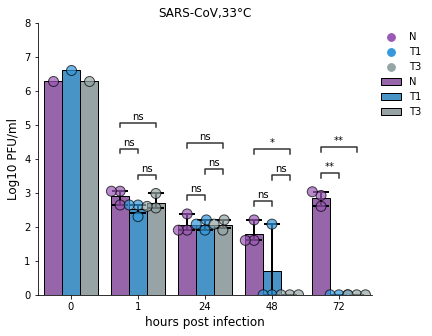

In [10]:
f = plt.figure(figsize=(6, 5))
ax = sns.barplot(data= SARS_33,
                x='hpi',
                y='titerLog', 
                hue="treatment",
                hue_order=["N", "T1", "T3"],
                palette = sns.color_palette(custcol),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )
g1 = sns.swarmplot(data= SARS_33,
                x='hpi',
                y='titerLog', 
                hue="treatment",
                hue_order=["N", "T1", "T3"],
                dodge = True, 
                palette = sns.color_palette(custcol),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.7,
                )



x = "hpi"
y='titerLog'
hue = "treatment"
box_pairs=[
    ((1.0, "N"), (1.0, "T1")),
    ((1.0, "N"), (1.0, "T3")),
    ((1.0, "T1"), (1.0, "T3")),
    ((24.0, "N"), (24.0, "T1")),
    ((24.0, "N"), (24.0, "T3")),
    ((24.0, "T1"), (24.0, "T3")),
    ((48.0, "N"), (48.0, "T1")),
    ((48.0, "N"), (48.0, "T3")),
    ((48.0, "T1"), (48.0, "T3")),
    ((72.0, "N"), (72.0, "T1")),
    ((72.0, "N"), (72.0, "T3")),
    #(72.0, "T1"), (72.0, "T3")),
    ]
add_stat_annotation(ax, data=SARS_33, x=x, y=y, hue=hue, hue_order=["N", "T1", "T3"], box_pairs=box_pairs, test="t-test_paired",comparisons_correction= None, loc='inside', verbose=2)

plt.yscale("linear")
plt.ylim([0,8])
plt.title("SARS-CoV,33°C")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)
sns.despine()

plt.savefig('Figure2bII.pdf', bbox_inches = 'tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_T1 v.s. 1_T3: t-test paired samples, P_val=1.694e-01 stat=2.110e+00
24_N v.s. 24_T1: t-test paired samples, P_val=1.841e-01 stat=1.996e+00
48_N v.s. 48_T1: t-test paired samples, P_val=1.828e-02 stat=7.295e+00
48_T1 v.s. 48_T3: t-test paired samples, P_val=4.226e-01 stat=-1.000e+00
72_N v.s. 72_T1: t-test paired samples, P_val=9.647e-03 stat=1.011e+01
72_T1 v.s. 72_T3: t-test paired samples, P_val=2.132e-01 stat=-1.803e+00
1_N v.s. 1_T1: t-test paired samples, P_val=3.803e-01 stat=-1.117e+00
24_N v.s. 24_T3: t-test paired samples, P_val=1.841e-01 stat=1.996e+00
48_N v.s. 48_T3: t-test paired samples, P_val=1.132e-01 stat=2.714e+00
72_N v.s. 72_T3: t-test paired samples, P_val=1.797e-01 stat=2.028e+00
1_N v.s. 1_T3: t-test paired samples, P_val=8.184e-01 stat=-2.612e-01


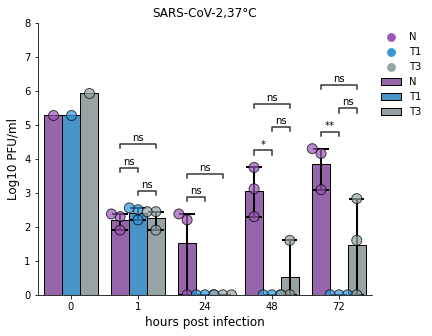

In [11]:
x = "hpi"
y='titerLog'
hue = "treatment"

box_pairs=[
    ((1.0, "N"), (1.0, "T1")),
    ((1.0, "N"), (1.0, "T3")),
    ((1.0, "T1"), (1.0, "T3")),
    ((24.0, "N"), (24.0, "T1")),
    ((24.0, "N"), (24.0, "T3")),
    #((24.0, "T1"), (24.0, "T3")),
    ((48.0, "N"), (48.0, "T1")),
    ((48.0, "N"), (48.0, "T3")),
    ((48.0, "T1"), (48.0, "T3")),
    ((72.0, "N"), (72.0, "T1")),
    ((72.0, "N"), (72.0, "T3")),
    ((72.0, "T1"), (72.0, "T3")),
    ]

f = plt.figure(figsize=(6, 5))
ax = sns.barplot(data= SARS2_37,
                x='hpi',
                y='titerLog', 
                hue="treatment",
                hue_order=["N", "T1", "T3"],
                palette = sns.color_palette(custcol),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )
g1 = sns.swarmplot(data= SARS2_37,
                x='hpi',
                y='titerLog', 
                hue="treatment",
                hue_order=["N", "T1", "T3"],
                dodge = True, 
                palette = sns.color_palette(custcol),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.7,
                )

add_stat_annotation(ax, data=SARS2_37, x=x, y=y, hue=hue, hue_order=["N", "T1", "T3"], box_pairs=box_pairs, test='t-test_paired',  comparisons_correction= None, loc='inside', verbose=2)



plt.yscale("linear")
plt.ylim([0,8])
plt.title("SARS-CoV-2,37°C")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)
sns.despine()

plt.savefig('Figure2bIII.pdf', bbox_inches = 'tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_T1 v.s. 1_T3: t-test paired samples, P_val=4.226e-01 stat=-1.000e+00
24_N v.s. 24_T1: t-test paired samples, P_val=1.903e-01 stat=1.951e+00
48_N v.s. 48_T1: t-test paired samples, P_val=4.869e-03 stat=1.428e+01
48_T1 v.s. 48_T3: t-test paired samples, P_val=4.226e-01 stat=-1.000e+00
72_N v.s. 72_T1: t-test paired samples, P_val=6.600e-02 stat=3.697e+00
72_T1 v.s. 72_T3: t-test paired samples, P_val=5.845e-01 stat=6.460e-01
1_N v.s. 1_T1: t-test paired samples, P_val=6.085e-01 stat=-6.017e-01
24_N v.s. 24_T3: t-test paired samples, P_val=1.903e-01 stat=1.951e+00
48_N v.s. 48_T3: t-test paired samples, P_val=5.341e-02 stat=4.152e+00
72_N v.s. 72_T3: t-test paired samples, P_val=7.558e-02 stat=3.428e+00
1_N v.s. 1_T3: t-test paired samples, P_val=2.726e-01 stat=-1.499e+00


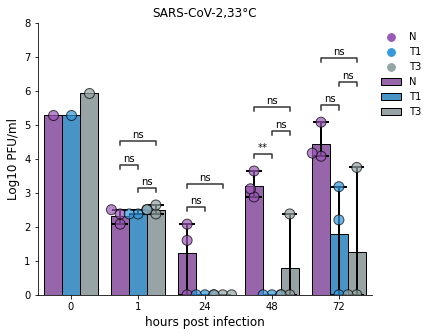

In [12]:
f = plt.figure(figsize=(6, 5))
ax = sns.barplot(data= SARS2_33,
                x='hpi',
                y='titerLog', 
                hue="treatment",
                hue_order=["N", "T1", "T3"],
                palette = sns.color_palette(custcol),
                linewidth = 1, 
                edgecolor = "black", 
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )
g1 = sns.swarmplot(data= SARS2_33,
                x='hpi',
                y='titerLog', 
                hue="treatment",
                hue_order=["N", "T1", "T3"],
                dodge = True, 
                palette = sns.color_palette(custcol),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.7,
                )

x = "hpi"
y='titerLog'
hue = "treatment"

box_pairs=[
    ((1.0, "N"), (1.0, "T1")),
    ((1.0, "N"), (1.0, "T3")),
    ((1.0, "T1"), (1.0, "T3")),
    ((24.0, "N"), (24.0, "T1")),
    ((24.0, "N"), (24.0, "T3")),
    #((24.0, "T1"), (24.0, "T3")),
    ((48.0, "N"), (48.0, "T1")),
    ((48.0, "N"), (48.0, "T3")),
    ((48.0, "T1"), (48.0, "T3")),
    ((72.0, "N"), (72.0, "T1")),
    ((72.0, "N"), (72.0, "T3")),
    ((72.0, "T1"), (72.0, "T3")),
    ]

add_stat_annotation(ax, data=SARS2_33, x=x, y=y, hue=hue, hue_order=["N", "T1", "T3"], box_pairs=box_pairs, test='t-test_paired',  comparisons_correction= None, loc='inside', verbose=2)

plt.yscale("linear")
plt.ylim([0,8])
plt.title("SARS-CoV-2,33°C")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)
sns.despine()

plt.savefig('Figure2bIV.pdf', bbox_inches = 'tight')